In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [48]:
def get_file_type(path):
    extension = os.path.splitext(path)[1].lower()

    if extension == '.csv':
        return 'csv'
    elif extension == '.xlsx' or extension == '.xls':
        return 'xlsx'
    elif extension == '.sql':
        return 'sql'
    else:
        return 'unknown'


def read_file(path , extension) :  
    if extension == 'csv':
        df = pd.read_csv(path)
        return df
    elif extension == 'xlsx' or extension == '.xls':
        df = pd.read_excel(path)
        return df
    elif extension == 'sql':
        with open(path, 'r') as sql_file:
            sql_query = sql_file.read()
        db_connection_string = "sqlite:///your_database.db"
        engine = create_engine(db_connection_string)
        df = pd.read_sql(sql_query, engine)
        return df
    
def preprocess_data(df, handle_duplicates=False):
   # Handle duplicates
    if handle_duplicates:
        df = df.drop_duplicates()

    # Handle missing values
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)

    # Convert date columns to datetime dtype
    date_columns = [col for col in df.columns if 'date' in col.lower()]
    for col in date_columns:
        df[col] = pd.to_datetime(df[col])
        
    return df


def visualize_histogram(column_data, column_name):
    plt.figure(figsize=(10, 6))
    plt.hist(column_data, bins=20, color='blue', alpha=0.7)
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {column_name}")
    plt.show()

    
def visualize_box_plot(column_data, column_name):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column_data, orient='v')
    plt.ylabel(column_name)
    plt.title(f"Box Plot of {column_name}")
    plt.show()

    
def visualize_scatter_plot(x_data, y_data, x_label, y_label):
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, alpha=0.5)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"Scatter Plot between {x_label} and {y_label}")
    plt.show()
    

def visualize_bar_plot(column_data, column_name):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=column_data, x=column_name)
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.title(f"Bar Plot of {column_name}")
    plt.xticks(rotation=45) 
    plt.show()


In [50]:
path = input("Enter your file path")
ex = get_file_type(path)
df = read_file(path , ex)
print("isna : " , df.isna().sum())
print("duplicates" , df.duplicated())
df
#C:\\Users\\ELITEBOOK\\Downloads\\archive\\International_Report_Departures.csv

Enter your file pathC:\\Users\\ELITEBOOK\\Downloads\\archive\\International_Report_Departures.csv
isna :  data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         3055
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64
duplicates 0         False
1         False
2         False
3         False
4         False
          ...  
930803    False
930804    False
930805    False
930806    False
930807    False
Length: 930808, dtype: bool


,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930803,07/01/2000,2000,7,13303,MIA,33,13605,NAS,204,20398,MQ,1,Departures,1422,0,1422
930804,04/01/2019,2019,4,13303,MIA,33,14286,PTY,162,19770,CM,0,Departures,1439,0,1439
930805,08/01/2000,2000,8,13303,MIA,33,13605,NAS,204,20398,MQ,1,Departures,1441,0,1441
930806,09/01/2004,2004,9,12266,IAH,74,15632,VSA,148,19534,AM,0,Departures,1461,0,1461


In [39]:
new_df = preprocess_data(df)
new_df

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930803,07/01/2000,2000,7,13303,MIA,33,13605,NAS,204,20398,MQ,1,Departures,1422,0,1422
930804,04/01/2019,2019,4,13303,MIA,33,14286,PTY,162,19770,CM,0,Departures,1439,0,1439
930805,08/01/2000,2000,8,13303,MIA,33,13605,NAS,204,20398,MQ,1,Departures,1441,0,1441
930806,09/01/2004,2004,9,12266,IAH,74,15632,VSA,148,19534,AM,0,Departures,1461,0,1461


In [51]:
print("isna : " , new_df.isna().sum())
print("duplicates" , new_df.duplicated())


isna :  data_dte        0
Year            0
Month           0
usg_apt_id      0
usg_apt         0
usg_wac         0
fg_apt_id       0
fg_apt          0
fg_wac          0
airlineid       0
carrier         0
carriergroup    0
type            0
Scheduled       0
Charter         0
Total           0
dtype: int64
duplicates 0         False
1         False
2         False
3         False
4         False
          ...  
930803    False
930804    False
930805    False
930806    False
930807    False
Length: 930808, dtype: bool


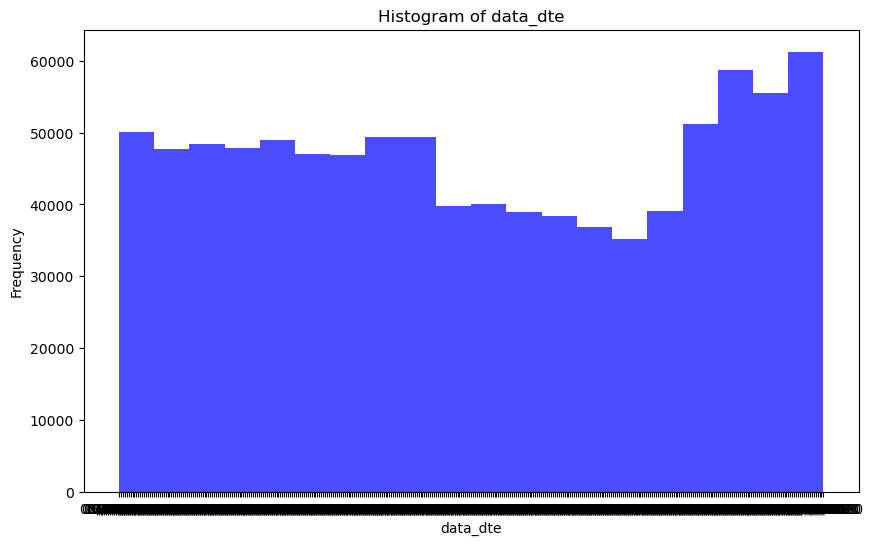

In [41]:
visualize_histogram(new_df['data_dte'] , 'data_dte')

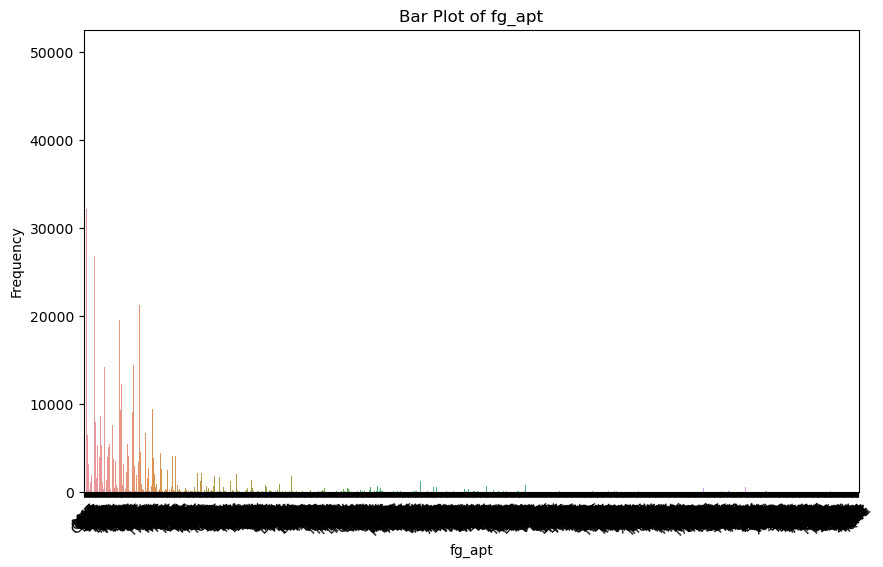

In [42]:
visualize_bar_plot(new_df[['fg_apt']], 'fg_apt')

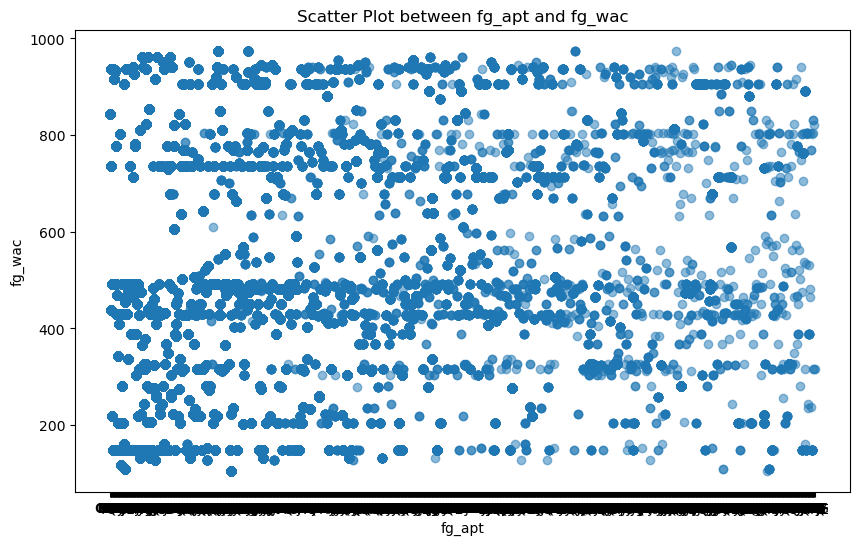

In [46]:
visualize_scatter_plot(new_df['fg_apt'], new_df['fg_wac'], 'fg_apt', 'fg_wac')
